Bank Marketing

Prediction using RandomForestCassifier
---

In [1]:
import pandas as pd

In [2]:
data1=pd.read_excel('./Downloads/90d844cb-b004-45d5-b40c-a6a84490454b-Bank-Marketing.xlsx')

In [3]:
data1.head()

,Age,Job,Marital Status,Account Balance,Own House,Personal Loan,No of campaigns,Subscription
0,59,unemployed,married,0,0,0,0,0
1,36,Others,married,3057,0,0,0,1
2,47,blue-collar,divorced,126,1,0,0,1
3,43,management,divorced,388,1,0,0,1
4,34,self-employed,single,462,0,0,0,1


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              4521 non-null   int64 
 1   Job              4521 non-null   object
 2   Marital Status   4521 non-null   object
 3   Account Balance  4521 non-null   int64 
 4   Own House        4521 non-null   int64 
 5   Personal Loan    4521 non-null   int64 
 6   No of campaigns  4521 non-null   int64 
 7   Subscription     4521 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 282.7+ KB


In [5]:
data1.isnull().sum()

Age                0
Job                0
Marital Status     0
Account Balance    0
Own House          0
Personal Loan      0
No of campaigns    0
Subscription       0
dtype: int64

In [7]:
data1['Job'].value_counts()

Others           2295
management        969
blue-collar       946
self-employed     183
unemployed        128
Name: Job, dtype: int64

In [12]:
data1.groupby('Job')[['Account Balance']].mean()

,Account Balance
Job,
Others,1437.412636
blue-collar,1085.161734
management,1766.928793
self-employed,1392.409836
unemployed,1089.421875


As in the table we have categorical data we will have to get dummies

In [17]:
cato_col=['Job','Marital Status']
data1_dummy=pd.get_dummies(data1,cato_col,drop_first=True)

In [18]:
data1_dummy

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Subscription,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,59,0,0,0,0,0,0,0,0,1,1,0
1,36,3057,0,0,0,1,0,0,0,0,1,0
2,47,126,1,0,0,1,1,0,0,0,0,0
3,43,388,1,0,0,1,0,1,0,0,0,0
4,34,462,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,58,0,1,0,0,0,1,0,0,0,1,0
4517,38,0,1,0,0,0,0,0,0,0,1,0
4518,53,2627,1,1,0,0,0,0,1,0,1,0
4519,49,371,1,0,0,0,1,0,0,0,1,0


Identifying the input and output variable

In [75]:
y=data1_dummy[['Subscription']]
x=data1_dummy.drop(columns='Subscription')

In [76]:
y

,Subscription
0,0
1,1
2,1
3,1
4,1
...,...
4516,0
4517,0
4518,0
4519,0


In [77]:
x

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,59,0,0,0,0,0,0,0,1,1,0
1,36,3057,0,0,0,0,0,0,0,1,0
2,47,126,1,0,0,1,0,0,0,0,0
3,43,388,1,0,0,0,1,0,0,0,0
4,34,462,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4516,58,0,1,0,0,1,0,0,0,1,0
4517,38,0,1,0,0,0,0,0,0,1,0
4518,53,2627,1,1,0,0,0,1,0,1,0
4519,49,371,1,0,0,1,0,0,0,1,0


As now the data is not in same range we  standardize it

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [79]:
data_final=sc.fit_transform(x)

In [102]:
data_scaled=pd.DataFrame(data_final,columns=x.columns)
data_scaled

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,1.686036,-0.472753,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,-0.205391,5.858354,0.785095,-0.599749
1,-0.488896,0.543096,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,-0.205391,-0.170696,0.785095,-0.599749
2,0.551289,-0.430883,0.875617,-0.424756,-0.320413,1.943983,-0.522306,-0.205391,-0.170696,-1.273731,-0.599749
3,0.173040,-0.343819,0.875617,-0.424756,-0.320413,-0.514408,1.914585,-0.205391,-0.170696,-1.273731,-0.599749
4,-0.678021,-0.319229,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,4.868770,-0.170696,-1.273731,1.667363
...,...,...,...,...,...,...,...,...,...,...,...
4516,1.591474,-0.472753,0.875617,-0.424756,-0.320413,1.943983,-0.522306,-0.205391,-0.170696,0.785095,-0.599749
4517,-0.299771,-0.472753,0.875617,-0.424756,-0.320413,-0.514408,-0.522306,-0.205391,-0.170696,0.785095,-0.599749
4518,1.118663,0.400206,0.875617,2.354292,-0.320413,-0.514408,-0.522306,4.868770,-0.170696,0.785095,-0.599749
4519,0.740414,-0.349469,0.875617,-0.424756,-0.320413,1.943983,-0.522306,-0.205391,-0.170696,0.785095,-0.599749


In [81]:
from sklearn.model_selection import train_test_split


In [103]:
x_train,x_test,y_train,y_test=train_test_split(data_scaled,y,test_size=0.2,random_state=42)

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=42)
model=rf.fit(x_train,y_train)


C:\Users\njlis\AppData\Local\Temp/ipykernel_6168/1479338046.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rf.fit(x_train,y_train)


In [119]:
y_test

,Subscription,Pred_svc
2398,0,0
800,0,0
2288,0,0
2344,0,0
3615,0,0
...,...,...
3589,0,0
3128,0,0
3259,0,0
4239,0,0


to find top 4 important features in random forest

In [123]:
model.feature_importances_

array([0.29875148, 0.47240272, 0.02777176, 0.01752421, 0.09334955,
       0.01778122, 0.02236561, 0.00881348, 0.00626702, 0.02048093,
       0.01449201])

In [130]:
pd.DataFrame(model.feature_importances_,x.columns)

,0
Age,0.298751
Account Balance,0.472403
Own House,0.027772
Personal Loan,0.017524
No of campaigns,0.093350
Job_blue-collar,0.017781
Job_management,0.022366
Job_self-employed,0.008813
Job_unemployed,0.006267
Marital Status_married,0.020481


top 4 important features are Account Balance,Age,No of campaigns,Own House

In [106]:
y_test['new_sup']=model.predict(x_test)

In [107]:
y_test

,Subscription,new_sup
2398,0,0
800,0,0
2288,0,0
2344,0,0
3615,0,0
...,...,...
3589,0,0
3128,0,0
3259,0,0
4239,0,0


In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [109]:
print(confusion_matrix(y_test['Subscription'],y_test['new_sup']))

[[779  24]
 [ 95   7]]


In [110]:
print(accuracy_score(y_test['Subscription'],y_test['new_sup']))

0.8685082872928177


Prediction using Support Vector Machine model
---

In [92]:
data1

,Age,Job,Marital Status,Account Balance,Own House,Personal Loan,No of campaigns,Subscription
0,59,unemployed,married,0,0,0,0,0
1,36,Others,married,3057,0,0,0,1
2,47,blue-collar,divorced,126,1,0,0,1
3,43,management,divorced,388,1,0,0,1
4,34,self-employed,single,462,0,0,0,1
...,...,...,...,...,...,...,...,...
4516,58,blue-collar,married,0,1,0,0,0
4517,38,Others,married,0,1,0,0,0
4518,53,self-employed,married,2627,1,1,0,0
4519,49,blue-collar,married,371,1,0,0,0


In [94]:
data1_dummy#after converting categorical values to numerical value

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Subscription,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,59,0,0,0,0,0,0,0,0,1,1,0
1,36,3057,0,0,0,1,0,0,0,0,1,0
2,47,126,1,0,0,1,1,0,0,0,0,0
3,43,388,1,0,0,1,0,1,0,0,0,0
4,34,462,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,58,0,1,0,0,0,1,0,0,0,1,0
4517,38,0,1,0,0,0,0,0,0,0,1,0
4518,53,2627,1,1,0,0,0,0,1,0,1,0
4519,49,371,1,0,0,0,1,0,0,0,1,0


In [95]:
y=data1_dummy[['Subscription']]
x=data1_dummy.drop(columns='Subscription')

In [97]:
x

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,59,0,0,0,0,0,0,0,1,1,0
1,36,3057,0,0,0,0,0,0,0,1,0
2,47,126,1,0,0,1,0,0,0,0,0
3,43,388,1,0,0,0,1,0,0,0,0
4,34,462,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4516,58,0,1,0,0,1,0,0,0,1,0
4517,38,0,1,0,0,0,0,0,0,1,0
4518,53,2627,1,1,0,0,0,1,0,1,0
4519,49,371,1,0,0,1,0,0,0,1,0


In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()
x_scal = sc.fit_transform(x)

In [101]:
x_scal = pd.DataFrame(x_scal,columns=x.columns)
x_scal.head()

,Age,Account Balance,Own House,Personal Loan,No of campaigns,Job_blue-collar,Job_management,Job_self-employed,Job_unemployed,Marital Status_married,Marital Status_single
0,1.686036,-0.472753,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,-0.205391,5.858354,0.785095,-0.599749
1,-0.488896,0.543096,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,-0.205391,-0.170696,0.785095,-0.599749
2,0.551289,-0.430883,0.875617,-0.424756,-0.320413,1.943983,-0.522306,-0.205391,-0.170696,-1.273731,-0.599749
3,0.173040,-0.343819,0.875617,-0.424756,-0.320413,-0.514408,1.914585,-0.205391,-0.170696,-1.273731,-0.599749
4,-0.678021,-0.319229,-1.142051,-0.424756,-0.320413,-0.514408,-0.522306,4.868770,-0.170696,-1.273731,1.667363


In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_scaled,y,test_size=0.2,random_state=42)

In [112]:
from sklearn.svm import SVC
svc = SVC()
model = svc.fit(x_train,y_train)

C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
y_test['Pred_svc'] = model.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [116]:
print(confusion_matrix(y_test['Subscription'],y_test['Pred_svc']))

[[803   0]
 [102   0]]


In [117]:
print(accuracy_score(y_test['Subscription'],y_test['Pred_svc']))

0.887292817679558


After performing Randomforest the accuracy obtained was 86.8% and that in SVM the accuracy was 88.7%.

1.As in SVM, the groups are classified based on support vectors and as they are differenciated by drawing lines from the support vectors and at an equidistance the line is drawn which classifies the 2 groups it gives better accuracy

2.evaluation metrices confusion metric,accuracy are important the are able to predict how many datapoints have given right prediction by confusion metrics and their accuracy of prediction.

# Cross Sell Insurance

In [132]:
import pandas as pd

In [133]:
data2=pd.read_excel('./Downloads/7edbd68e-db5e-40de-ad8a-28f3543be1af-Cross-Sell-Insurance.xlsx')

In [134]:
data2

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage Score,Response
0,1,Male,44,1,0,> 2 Years,Yes,40454,217,1
1,2,Male,76,1,0,1-2 Year,No,33536,183,0
2,3,Male,47,1,0,> 2 Years,Yes,38294,27,1
3,4,Male,21,1,1,< 1 Year,No,28619,203,0
4,5,Female,29,1,1,< 1 Year,No,27496,39,0
...,...,...,...,...,...,...,...,...,...,...
3994,3995,Male,29,1,1,< 1 Year,No,24345,95,0
3995,3996,Female,26,1,1,< 1 Year,No,19324,246,0
3996,3997,Female,46,1,0,1-2 Year,Yes,34193,39,1
3997,3998,Female,23,1,1,< 1 Year,Yes,34244,104,0


In [135]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3999 non-null   int64 
 1   Gender              3999 non-null   object
 2   Age                 3999 non-null   int64 
 3   Driving_License     3999 non-null   int64 
 4   Previously_Insured  3999 non-null   int64 
 5   Vehicle_Age         3999 non-null   object
 6   Vehicle_Damage      3999 non-null   object
 7   Annual_Premium      3999 non-null   int64 
 8   Vintage Score       3999 non-null   int64 
 9   Response            3999 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 312.5+ KB


In [136]:
cata_cal=['Gender','Vehicle_Age','Vehicle_Damage']
data_dummy=pd.get_dummies(data2,cata_cal,drop_first=True)

In [137]:
data_dummy

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage Score,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,0,40454,217,1,1,0,1,1
1,2,76,1,0,33536,183,0,1,0,0,0
2,3,47,1,0,38294,27,1,1,0,1,1
3,4,21,1,1,28619,203,0,1,1,0,0
4,5,29,1,1,27496,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,29,1,1,24345,95,0,1,1,0,0
3995,3996,26,1,1,19324,246,0,0,1,0,0
3996,3997,46,1,0,34193,39,1,0,0,0,1
3997,3998,23,1,1,34244,104,0,0,1,0,1


identifying input and output variable

In [138]:
x=data_dummy.drop(columns='Response')

In [139]:
y=data_dummy[['Response']]

In [140]:
y

,Response
0,1
1,0
2,1
3,0
4,0
...,...
3994,0
3995,0
3996,1
3997,0


In [141]:
from sklearn.preprocessing import StandardScaler
sc_scal=StandardScaler()
x_scal=sc_scal.fit_transform(x)
data_scaled=pd.DataFrame(x_scal,columns=x.columns)
data_scaled

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage Score,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,-1.731618,0.362690,0.052519,-0.894729,0.570142,0.725406,0.935790,-0.889757,4.477429,0.973105
1,-1.730751,2.448000,0.052519,-0.894729,0.155316,0.317537,0.935790,-0.889757,-0.223342,-1.027639
2,-1.729885,0.558188,0.052519,-0.894729,0.440621,-1.553865,0.935790,-0.889757,4.477429,0.973105
3,-1.729019,-1.136126,0.052519,1.117657,-0.139524,0.557460,0.935790,1.123903,-0.223342,-1.027639
4,-1.728153,-0.614799,0.052519,1.117657,-0.206863,-1.409911,-1.068615,1.123903,-0.223342,-1.027639
...,...,...,...,...,...,...,...,...,...,...
3994,1.728153,-0.614799,0.052519,1.117657,-0.395807,-0.738125,0.935790,1.123903,-0.223342,-1.027639
3995,1.729019,-0.810297,0.052519,1.117657,-0.696883,1.073295,-1.068615,1.123903,-0.223342,-1.027639
3996,1.729885,0.493022,0.052519,-0.894729,0.194712,-1.409911,-1.068615,-0.889757,-0.223342,0.973105
3997,1.730751,-1.005795,0.052519,1.117657,0.197770,-0.630160,-1.068615,1.123903,-0.223342,0.973105


In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_scaled,y,test_size=0.2,random_state=42)

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=42)
model=rf.fit(x_train,y_train)

C:\Users\njlis\AppData\Local\Temp/ipykernel_6168/542848443.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rf.fit(x_train,y_train)


In [144]:
y_test['pred_response']=model.predict(x_test)

In [145]:
y_test

,Response,pred_response
1760,0,0
3326,1,0
1770,0,0
3176,0,0
2099,0,0
...,...,...
2510,0,0
2752,0,0
1869,1,0
423,0,0


In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test['Response'],y_test['pred_response']))
print(confusion_matrix(y_test['Response'],y_test['pred_response']))

0.87375
[[688  16]
 [ 85  11]]


Prediction with SVM


In [147]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(x_train,y_train)

C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
y_test['svm_response_pred']=model.predict(x_test)

In [149]:
y_test

,Response,pred_response,svm_response_pred
1760,0,0,0
3326,1,0,0
1770,0,0,0
3176,0,0,0
2099,0,0,0
...,...,...,...
2510,0,0,0
2752,0,0,0
1869,1,0,0
423,0,0,0


Buiding SVM model

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test['Response'],y_test['svm_response_pred']))
print(confusion_matrix(y_test['Response'],y_test['svm_response_pred']))

0.88
[[704   0]
 [ 96   0]]


After performing svm the accuracy got is 88% which has better accuracy that of random forest with 87.3%

1.As in SVM, the groups are classified based on support vectors and as they are differenciated by drawing lines from the support vectors and at an equidistance the line is drawn which classifies the 2 groups it gives better accuracy


2.evaluation metrices confusion metric,accuracy are important the are able to predict how many datapoints have given right prediction by confusion metrics and their accuracy of prediction.


# Wine Clustering

In [151]:
import pandas as pd

In [152]:
data3=pd.read_excel('./Downloads/657ff50e-d268-4ba6-a141-82733aa20b5d-wine-clustering.xlsx')

In [153]:
data3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Taking numerical values and plotting scatterplot

C:\Users\njlis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ash_Alcanity', ylabel='Alcohol'>

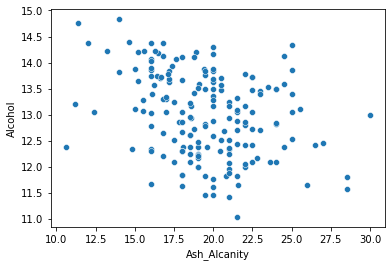

In [154]:
import seaborn as sns
sns.scatterplot(data3['Ash_Alcanity'],data3['Alcohol'])

In [155]:
from sklearn.cluster import KMeans

In [156]:
error=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit(data3)
    error.append(km.inertia_)

C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [157]:
error

[17592296.383508474,
 4543749.614531861,
 2370689.686782968,
 1332043.8610845527,
 916379.1871539169,
 647326.0020260847,
 412303.82825080125,
 324361.85886701895,
 270954.92924153747,
 217887.378560333,
 187559.66963647536,
 160185.73173521683,
 138759.8150641605,
 124887.31727815415,
 110595.98788179155]

C:\Users\njlis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

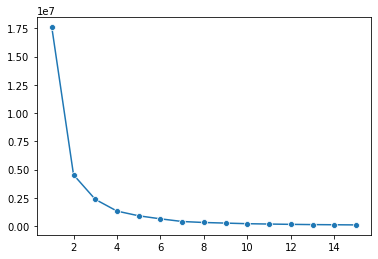

In [158]:
sns.lineplot(range(1,16),error,marker='o')

In [167]:
km=KMeans(n_clusters=5)
km.fit(data3)

C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [168]:
km=KMeans(n_clusters=5)
km.fit(data3)

C:\Users\njlis\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [169]:
data3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [170]:
data3['clusters']=km.predict(data3)

In [171]:
data3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [172]:
data3['clusters']=km.predict(data3)

In [173]:
data3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [174]:
data3.groupby('clusters').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clusters,,,,,,,,,,,,,
0,12.475088,2.325263,2.280000,20.636842,91.719298,2.105789,1.871404,0.383333,1.468421,3.952105,0.960526,2.544386,435.578947
1,13.718519,1.968148,2.373333,16.892593,104.666667,2.837037,2.964444,0.277778,1.911852,5.243333,1.049630,3.192222,1072.407407
2,13.920500,1.769000,2.497500,17.200000,106.650000,2.908000,3.081500,0.295500,1.908500,6.322500,1.117000,3.008500,1360.850000
3,12.741667,2.683542,2.364167,20.612500,97.125000,1.966875,1.328333,0.412917,1.385625,5.541875,0.864583,2.188750,636.125000
4,13.177692,2.538462,2.452692,19.396154,111.730769,2.281923,1.888846,0.358846,1.660769,5.424615,0.903692,2.631923,823.576923


C:\Users\njlis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ash_Alcanity', ylabel='Alcohol'>

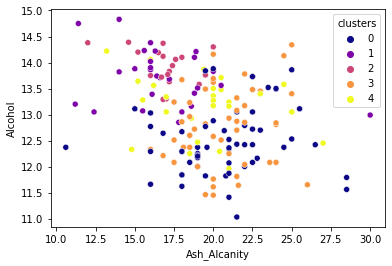

In [175]:
sns.scatterplot(data3['Ash_Alcanity'],data3['Alcohol'],hue=data3['clusters'],palette='plasma')

the number of clusters obtained is 5


From the clusters formed it can inferred that for every cluster the alcohoic content is different and cluster 2 has more alcohol content and remaining units of wine are also high for the same and it is somewhat decreasing with decreasing content of alcohol.